In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [13]:
# File to Load (Remember to Change These)
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

In [15]:
# Read the Mouse and Drug Data and the Clinical Trial Data

# Combine the data into a single dataset
full_df = pd.merge(mouse_drug, clinical_trial, how='inner', on = 'Mouse ID')

# Display the data table for preview
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#series
Mean_tumor = full_df.groupby(["Drug","Timepoint"]).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
Mean_tumor_df = pd.DataFrame(Mean_tumor)
#reset index
Mean_tumor_df = pd.DataFrame(Mean_tumor).reset_index()

Mean_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Sem_tumor = full_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
Sem_tumor_df = pd.DataFrame(Sem_tumor).reset_index()

# Preview DataFrame
Sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
# Minor Data Munging to Re-Format the Data Frames
Mean_pivot = Mean_tumor_df.pivot(index='Timepoint', columns='Drug' , values='Tumor Volume (mm3)')
Sem_pivot = Sem_tumor_df.pivot(index='Timepoint', columns='Drug' , values='Tumor Volume (mm3)')

In [20]:
# Preview that Reformatting worked
Mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [21]:
# Preview that Reformatting worked
Sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


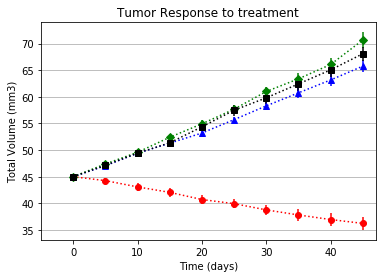

In [22]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

#drug1
ax.errorbar(Mean_pivot.index, Mean_pivot.Capomulin, yerr=Sem_pivot.Capomulin, fmt="o:", color='r')
#drug2
ax.errorbar(Mean_pivot.index, Mean_pivot.Infubinol, yerr=Sem_pivot.Infubinol, fmt="^:", color='b')
#drug3
ax.errorbar(Mean_pivot.index, Mean_pivot.Ketapril, yerr=Sem_pivot.Ketapril, fmt="D:", color='g')
#placebo
ax.errorbar(Mean_pivot.index, Mean_pivot.Placebo, yerr=Sem_pivot.Placebo, fmt="s:", color='black')


ax.set_xlim(-5, 47)
ax.set_title("Tumor Response to treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Total Volume (mm3)")

ax.grid(axis = 'y')

# Save the Figure
plt.savefig('Tumor Response to treatment.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint

Mean_met_size = full_df.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

#convert to PD and reset index
Mean_metSize_df = pd.DataFrame(Mean_met_size).reset_index()

Mean_metSize_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Sem_met_size = full_df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
Sem_metSize_df = pd.DataFrame(Sem_met_size).reset_index()

# Preview DataFrame
Sem_metSize_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count_mouse_df = full_df.groupby(["Drug","Timepoint"]).count()["Mouse ID"]

count_mouse_df = count_mouse_df.reset_index()
counr_mouse_df_ren = count_mouse_df.rename(columns={"Mouse ID":"Mouse Count"})
# Convert to DataFrame

# Preview DataFrame
count_mouse_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

count_mouse_pivot = count_mouse_df.pivot(index='Timepoint' , columns= 'Drug', values="Mouse ID" )
# Preview the Data Frame
count_mouse_pivot


In [ ]:
#Computing the percentage
prcnt_mouse_Capomulin=count_mouse_pivot.Capomulin.subtract(25).add(25).div(25)*100
prcnt_mouse_Ceftamin=count_mouse_pivot.Ceftamin.subtract(25).add(25).div(25)*100
prcnt_mouse_Infubinol=count_mouse_pivot.Infubinol.subtract(25).add(25).div(25)*100
prcnt_mouse_Ketapril=count_mouse_pivot.Ketapril.subtract(25).add(25).div(25)*100
prcnt_mouse_Naftisol=count_mouse_pivot.Naftisol.subtract(25).add(25).div(25)*100
prcnt_mouse_Placebo=count_mouse_pivot.Placebo.subtract(25).add(25).div(25)*100
prcnt_mouse_Propriva=count_mouse_pivot.Propriva.subtract(26).add(26).div(26)*100
prcnt_mouse_Ramicane=count_mouse_pivot.Ramicane.subtract(25).add(25).div(25)*100
prcnt_mouse_Stelasyn=count_mouse_pivot.Stelasyn.subtract(26).add(26).div(26)*100
prcnt_mouse_Zoniferol=count_mouse_pivot.Zoniferol.subtract(25).add(25).div(25)*100


In [ ]:
#rebuilding a df for percentage

Timepoint=[0,5,10,15,20,25,30,35,40,45]

list_of_tuples = list(zip(Timepoint, prcnt_mouse_Capomulin, prcnt_mouse_Ceftamin, prcnt_mouse_Infubinol,
                         prcnt_mouse_Ketapril, prcnt_mouse_Naftisol, prcnt_mouse_Placebo,
                         prcnt_mouse_Propriva, prcnt_mouse_Ramicane, prcnt_mouse_Stelasyn,
                         prcnt_mouse_Zoniferol)) 

list_of_tuples 

count_mouse = pd.DataFrame(list_of_tuples, columns = ['Timepoint','Capomulin', 'Ceftamin', 'Infubinol',
                         'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
                         'Zoniferol'])  
count_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
fig, ax3 = plt.subplots()
#mouse count
ax3.errorbar(count_mouse.Timepoint, count_mouse.Capomulin, fmt="o:", color='r')
ax3.errorbar(count_mouse.Timepoint, count_mouse.Infubinol, fmt="^:", color='b')
ax3.errorbar(count_mouse.Timepoint, count_mouse.Ketapril, fmt="s:", color='g')
ax3.errorbar(count_mouse.Timepoint, count_mouse.Placebo, fmt="D:", color='black')

ax3.set_xlim(-5, 50)
ax.set_ylim(30, 105)
ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time (days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.grid()

# Save the Figure
plt.savefig('Survival During Treatment.png')

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
Mean_tumor_change = {'Drugs':['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',
                             'Placebo','Propriva','Ramicane', 'Stelasyn', 'Zoniferol'],
                      'Percent_Change':[(Mean_pivot['Capomulin'].iat[-1] - Mean_pivot['Capomulin'].iat[0])/45*100,
                                        (Mean_pivot['Ceftamin'].iat[-1] - Mean_pivot['Ceftamin'].iat[0])/45*100,
                                        (Mean_pivot['Infubinol'].iat[-1] - Mean_pivot['Infubinol'].iat[0])/45*100,
                                        (Mean_pivot['Ketapril'].iat[-1] - Mean_pivot['Ketapril'].iat[0])/45*100,
                                        (Mean_pivot['Naftisol'].iat[-1] - Mean_pivot['Naftisol'].iat[0])/45*100,
                                        (Mean_pivot['Placebo'].iat[-1] - Mean_pivot['Placebo'].iat[0])/45*100,
                                        (Mean_pivot['Propriva'].iat[-1] - Mean_pivot['Propriva'].iat[0])/45*100,
                                        (Mean_pivot['Ramicane'].iat[-1] - Mean_pivot['Ramicane'].iat[0])/45*100,
                                        (Mean_pivot['Stelasyn'].iat[-1] - Mean_pivot['Stelasyn'].iat[0])/45*100,
                                        (Mean_pivot['Zoniferol'].iat[-1] - Mean_pivot['Zoniferol'].iat[0])/45*100]
                     }
Mean_tumor_change_df = pd.DataFrame(Mean_tumor_change)

# Display the data to confirm

Mean_tumor_change_df

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment.png')


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)